,<CLOSE>
0,126.56
1,128.28
2,129.56
3,129.69
4,129.57
...,...
280,141.24
281,140.41
282,140.80
283,140.96


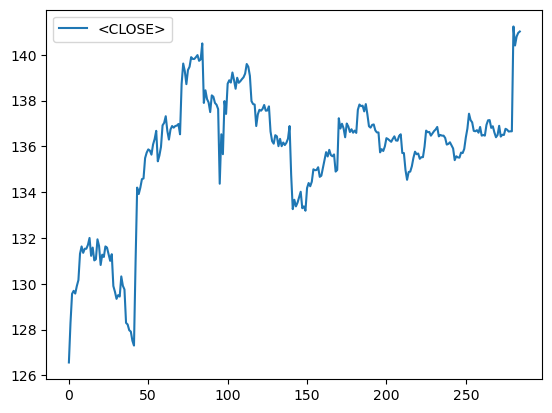

In [29]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

dataframe = pandas.read_csv("SBER_221105_221205.txt", usecols=[7])
dataset = dataframe.values
dataframe.plot(subplots=True)
dataframe

In [30]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.        ],
       [0.11716621],
       [0.20435967],
       [0.21321526],
       [0.20504087],
       [0.22752044],
       [0.24523161],
       [0.32356948],
       [0.34536785],
       [0.32629428],
       [0.33855586],
       [0.33855586],
       [0.35013624],
       [0.37057221],
       [0.31743869],
       [0.34196185],
       [0.30381471],
       [0.30722071],
       [0.36648501],
       [0.34673025],
       [0.29019074],
       [0.32084469],
       [0.3140327 ],
       [0.34536785],
       [0.34196185],
       [0.32288828],
       [0.30245232],
       [0.32220708],
       [0.22752044],
       [0.21049046],
       [0.1893733 ],
       [0.20027248],
       [0.19618529],
       [0.25613079],
       [0.22820163],
       [0.21730245],
       [0.11784741],
       [0.11307902],
       [0.09604905],
       [0.09196185],
       [0.0647139 ],
       [0.05040872],
       [0.29972752],
       [0.52043597],
       [0.5013624 ],
       [0.52043597],
       [0.54564033],
       [0.547

In [31]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

190 95


In [32]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [33]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [34]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [35]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
188/188 - 1s - loss: 0.3387 - 1s/epoch - 6ms/step
Epoch 2/100
188/188 - 0s - loss: 0.1069 - 156ms/epoch - 828us/step
Epoch 3/100
188/188 - 0s - loss: 0.0434 - 155ms/epoch - 826us/step
Epoch 4/100
188/188 - 0s - loss: 0.0330 - 158ms/epoch - 841us/step
Epoch 5/100
188/188 - 0s - loss: 0.0293 - 155ms/epoch - 822us/step
Epoch 6/100
188/188 - 0s - loss: 0.0259 - 152ms/epoch - 810us/step
Epoch 7/100
188/188 - 0s - loss: 0.0227 - 158ms/epoch - 842us/step
Epoch 8/100
188/188 - 0s - loss: 0.0193 - 153ms/epoch - 813us/step
Epoch 9/100
188/188 - 0s - loss: 0.0162 - 155ms/epoch - 824us/step
Epoch 10/100
188/188 - 0s - loss: 0.0131 - 156ms/epoch - 830us/step
Epoch 11/100
188/188 - 0s - loss: 0.0105 - 157ms/epoch - 835us/step
Epoch 12/100
188/188 - 0s - loss: 0.0083 - 158ms/epoch - 840us/step
Epoch 13/100
188/188 - 0s - loss: 0.0064 - 157ms/epoch - 833us/step
Epoch 14/100
188/188 - 0s - loss: 0.0049 - 157ms/epoch - 837us/step
Epoch 15/100
188/188 - 0s - loss: 0.0040 - 170ms/epoch - 903us

In [36]:
#make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#расчет ошибки на обучающих, тестовых (валидационных) данных
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 [==============================] - 0s 998us/step
Train Score: 0.75 RMSE
Test Score: 0.59 RMSE


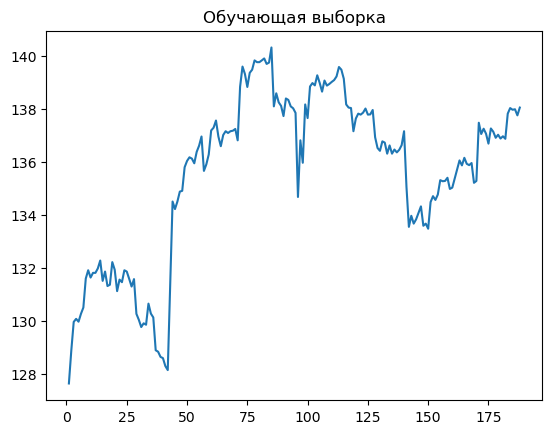

In [38]:
labels = ['History', 'True Future', 'Model Prediction']
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
plt.title("Обучающая выборка")
plt.plot(trainPredictPlot)
plt.show()

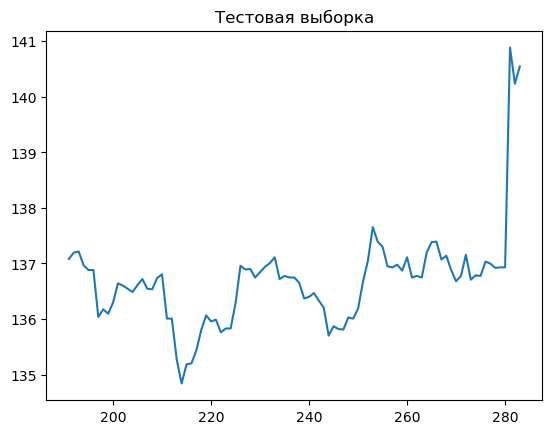

In [39]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.plot(testPredictPlot)
plt.title("Тестовая выборка")
plt.show()

Исходный набор данных показан синим цветом, прогнозы для обучающего набора данных зеленым цветом и 
прогнозы для невидимого тестового набора данных красным цветом.

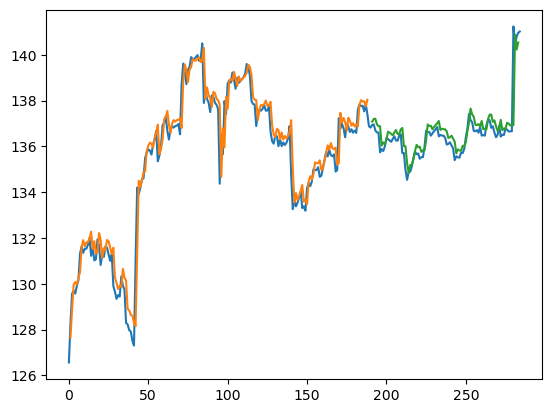

In [37]:
# shift train predictions for plotting
labels = ['History', 'True Future', 'Model Prediction']
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0
        
    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
        
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt